In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
plt.style.use('~/line_plot.mplstyle')

import json, os, pickle
from scipy.signal import argrelmin
from pathlib import Path

C6 = 2 * np.pi * .862690

In [10]:
top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/23-07-20_09-19-50"
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/23-07-20_15-15-40"
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/23-07-21_09-23-53"
data_dir = top_dir + "/phase_diagram_data"

# data_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/temp_data_dir"


f_names = os.listdir(data_dir)

n_ys = []
rbs_over_a = []
deltas_over_omega = []

stag_mags = []
M_N_2s = []
M_N_4s = []
X_ss = []
U_4s = []

for f_name in f_names:

  with open(Path(data_dir, f_name), 'r') as f:
    data_dict = json.load(f)

  omega = data_dict["params"]["ham_config"]["omega"]
    
  Rb = (C6 / omega) ** (1 / 6)

  n_ys.append(data_dict["params"]["ham_config"]["n_y"])

  rbs_over_a.append(Rb / data_dict["params"]["ham_config"]["a"])
  deltas_over_omega.append(data_dict["params"]["ham_config"]["delta"] / omega)
  
  stag_mags.append(data_dict["results"]["m_s"])
  M_N_2s.append(data_dict["results"]["M_N_2"])
  M_N_4s.append(data_dict["results"]["M_N_4"])
  X_ss.append(data_dict["results"]["X_s"])
  U_4s.append(data_dict["results"]["U_4"])
    
rb_over_a = rbs_over_a[0]

In [11]:
distinct_nys = []
for n_y in n_ys:
    if not n_y in distinct_nys:
        distinct_nys.append(n_y)

distinct_nys = list(distinct_nys)
distinct_nys.sort()

data = {}

for n_y in distinct_nys:
    data[n_y] = {}
    data[n_y]["deltas_over_omega"] = []
    data[n_y]["m_s"] = []
    data[n_y]["M_N_2"] = []
    data[n_y]["M_N_4"] = []
    data[n_y]["X_s"] = []
    data[n_y]["U_4"] = []

for ii, n_y in enumerate(n_ys):
    data[n_y]["deltas_over_omega"].append(deltas_over_omega[ii])
    data[n_y]["m_s"].append(stag_mags[ii])
    data[n_y]["M_N_2"].append(M_N_2s[ii])
    data[n_y]["M_N_4"].append(M_N_4s[ii])
    data[n_y]["X_s"].append(X_ss[ii])
    data[n_y]["U_4"].append(U_4s[ii])
    
for n_y in distinct_nys:
    data[n_y]["deltas_over_omega"] = np.array(data[n_y]["deltas_over_omega"])
    data[n_y]["m_s"] = np.array(data[n_y]["m_s"])
    data[n_y]["M_N_2"] = np.array(data[n_y]["M_N_2"])
    data[n_y]["M_N_4"] = np.array(data[n_y]["M_N_4"])
    data[n_y]["X_s"] = np.array(data[n_y]["X_s"])
    data[n_y]["U_4"] = np.array(data[n_y]["U_4"])
    
deltas_over_omega = set(list(deltas_over_omega))

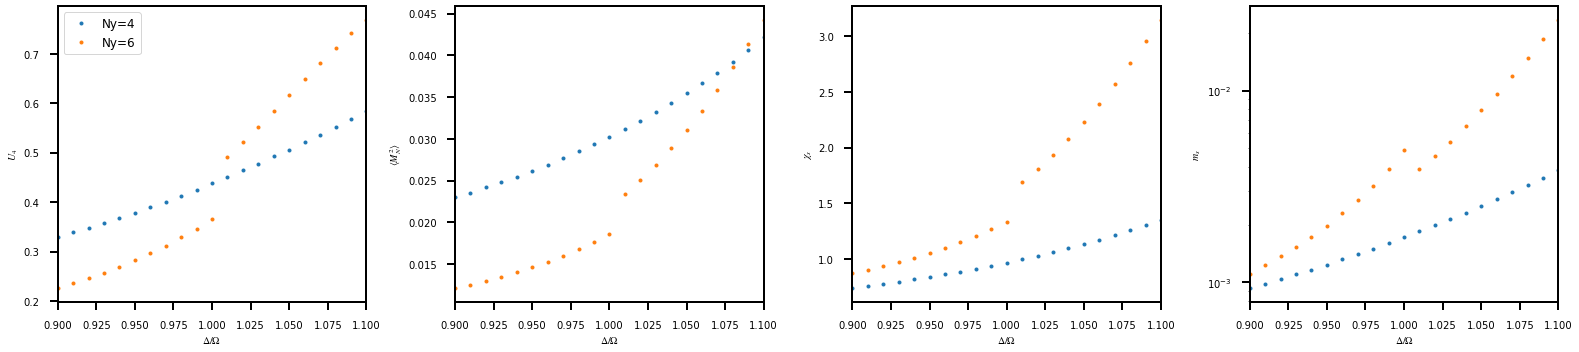

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

for n_y in distinct_nys:
    x_ax = data[n_y]["deltas_over_omega"]
    
    axes[0].plot(x_ax, data[n_y]["U_4"], '.', label=f"Ny={n_y}")
    axes[0].set_ylabel(r"$U_4$")
    
    axes[1].plot(x_ax, data[n_y]["M_N_2"], '.')#, label=f"Ny={n_y}")
    axes[1].set_ylabel(r"$\langle M_N^2 \rangle$")
    
    axes[2].plot(x_ax, data[n_y]["X_s"], '.')#, label=f"Ny={n_y}")
    axes[2].set_ylabel(r"$\chi_s$")
    
    axes[3].plot(x_ax, data[n_y]["m_s"], '.')#, label=f"Ny={n_y}")
    axes[3].set_ylabel(r"$m_s$")

axes[0].legend(fontsize=12)
# axes[1].set_ylim(0, 0.01)

for ax in axes:
    # ax.set_xmargin(0)
    ax.set_xlabel(r"$\Delta/\Omega$")

axes[3].set_yscale("log")
plt.tight_layout()
plt.show()

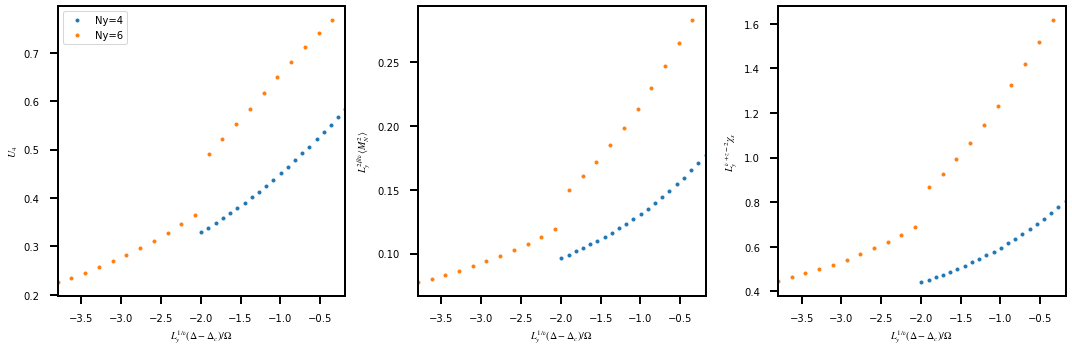

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

delta_c = 1.12
v = 0.629
beta = 0.326
eta = 0.036
z = 1

for n_y in distinct_nys:
    x_ax = (n_y ** (1 / v)) * (data[n_y]["deltas_over_omega"] - delta_c)
    
    axes[0].plot(x_ax, data[n_y]["U_4"], '.', label=f"Ny={n_y}")
    axes[0].set_ylabel(r"$U_4$")
    
    # axes[1].plot(x_ax, (n_y ** (2 * beta / v)) * (data[n_y]["m_s"] ** 2), '.')#, label=f"Ny={n_y}")
    # axes[1].set_ylabel(r"$L_y^{2\beta/\nu} m_s^2$")
    
    axes[1].plot(x_ax, (n_y ** (2 * beta / v)) * data[n_y]["M_N_2"], '.')#, label=f"Ny={n_y}")
    axes[1].set_ylabel(r"$L_y^{2\beta/\nu}\langle M_N^2 \rangle$")
    
    axes[2].plot(x_ax, (n_y ** (v + z - 2)) * data[n_y]["X_s"], '.')#, label=f"Ny={n_y}")
    axes[2].set_ylabel(r"$L_y^{\nu+z-2}\chi_s$")

for ax in axes:
    ax.set_xlabel(r"$L_y^{1/\nu}(\Delta - \Delta_c)/\Omega$")

axes[0].legend()
plt.tight_layout()
plt.show()